In [1]:
# Importing necessary libararies
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
sns.set_style('whitegrid')

In [3]:
df= pd.read_csv("global_sustainable_data.csv")

In [4]:
# df.head().iloc[:,:10]
df.head()

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,"6,52,230",33.93911,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,"6,52,230",33.93911,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,"6,52,230",33.93911,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,"6,52,230",33.93911,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,"6,52,230",33.93911,67.709953


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

In [6]:
# Feature wise null value percentage
df.isnull().mean().sort_values()*100

Entity                                                               0.000000
Year                                                                 0.000000
Primary energy consumption per capita (kWh/person)                   0.000000
Land Area(Km2)                                                       0.027405
Density\n(P/Km2)                                                     0.027405
Latitude                                                             0.027405
Longitude                                                            0.027405
Access to electricity (% of population)                              0.274048
Electricity from fossil fuels (TWh)                                  0.575500
Electricity from renewables (TWh)                                    0.575500
Low-carbon electricity (% electricity)                               1.151000
Electricity from nuclear (TWh)                                       3.453001
Access to clean fuels for cooking                               

<AxesSubplot:>

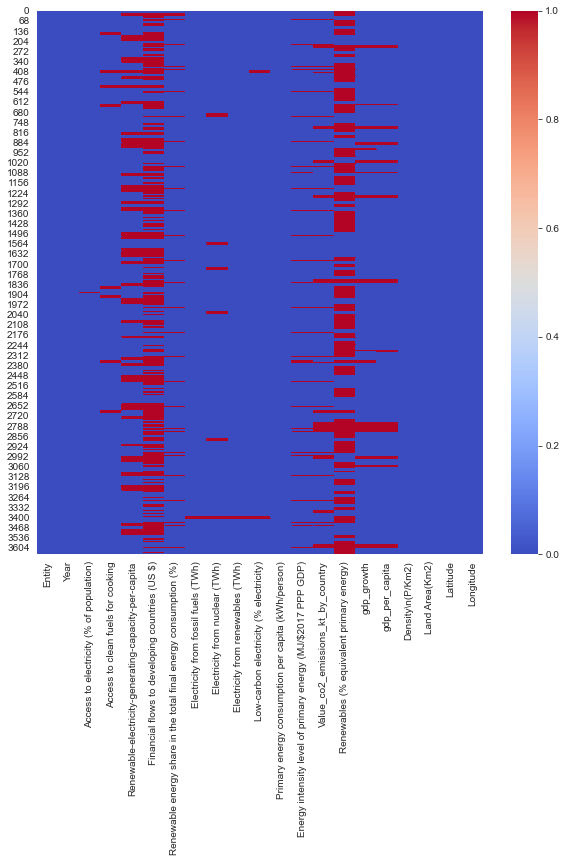

In [7]:
# Null values visualization 
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull(),cmap='coolwarm')

From null values analysis it is clear the following features are better to be dropped:
- Renewable-electricity-generating-capacity-per-capita --------------->25.513839% null values <br>
- Financial flows to developing countries (US $)------------------------>57.248561% null values <br>
- Renewables (% equivalent primary energy) --------------------------->58.563990% null values <br>


In [8]:
# Density and Land Area features are object datatype in dataframe. Converting them into float. 

# Density\\n(P/Km2) has mixture of float and str values. 
# Function to convert values to float. 
def convert_to_float(value):
    if isinstance(value, str):  # Check if the value is a string
        cleaned_str = value.replace(",", "")
        return float(cleaned_str)
    else:
        return value 



In [9]:
df['Density\\n(P/Km2)']= df['Density\\n(P/Km2)'].apply(convert_to_float)

In [10]:
df['Land Area(Km2)'] = df['Land Area(Km2)'].apply(convert_to_float)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3649 entries, 0 to 3648
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3649 non-null   object 
 1   Year                                                              3649 non-null   int64  
 2   Access to electricity (% of population)                           3639 non-null   float64
 3   Access to clean fuels for cooking                                 3480 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              2718 non-null   float64
 5   Financial flows to developing countries (US $)                    1560 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3455 non-null   float64
 7   Electricity from fossil fuels (TW

In [12]:
# Deleting Latitude and Longitude 
col_d= ['Latitude','Longitude']
for col in col_d:
    del df[col]

<AxesSubplot:>

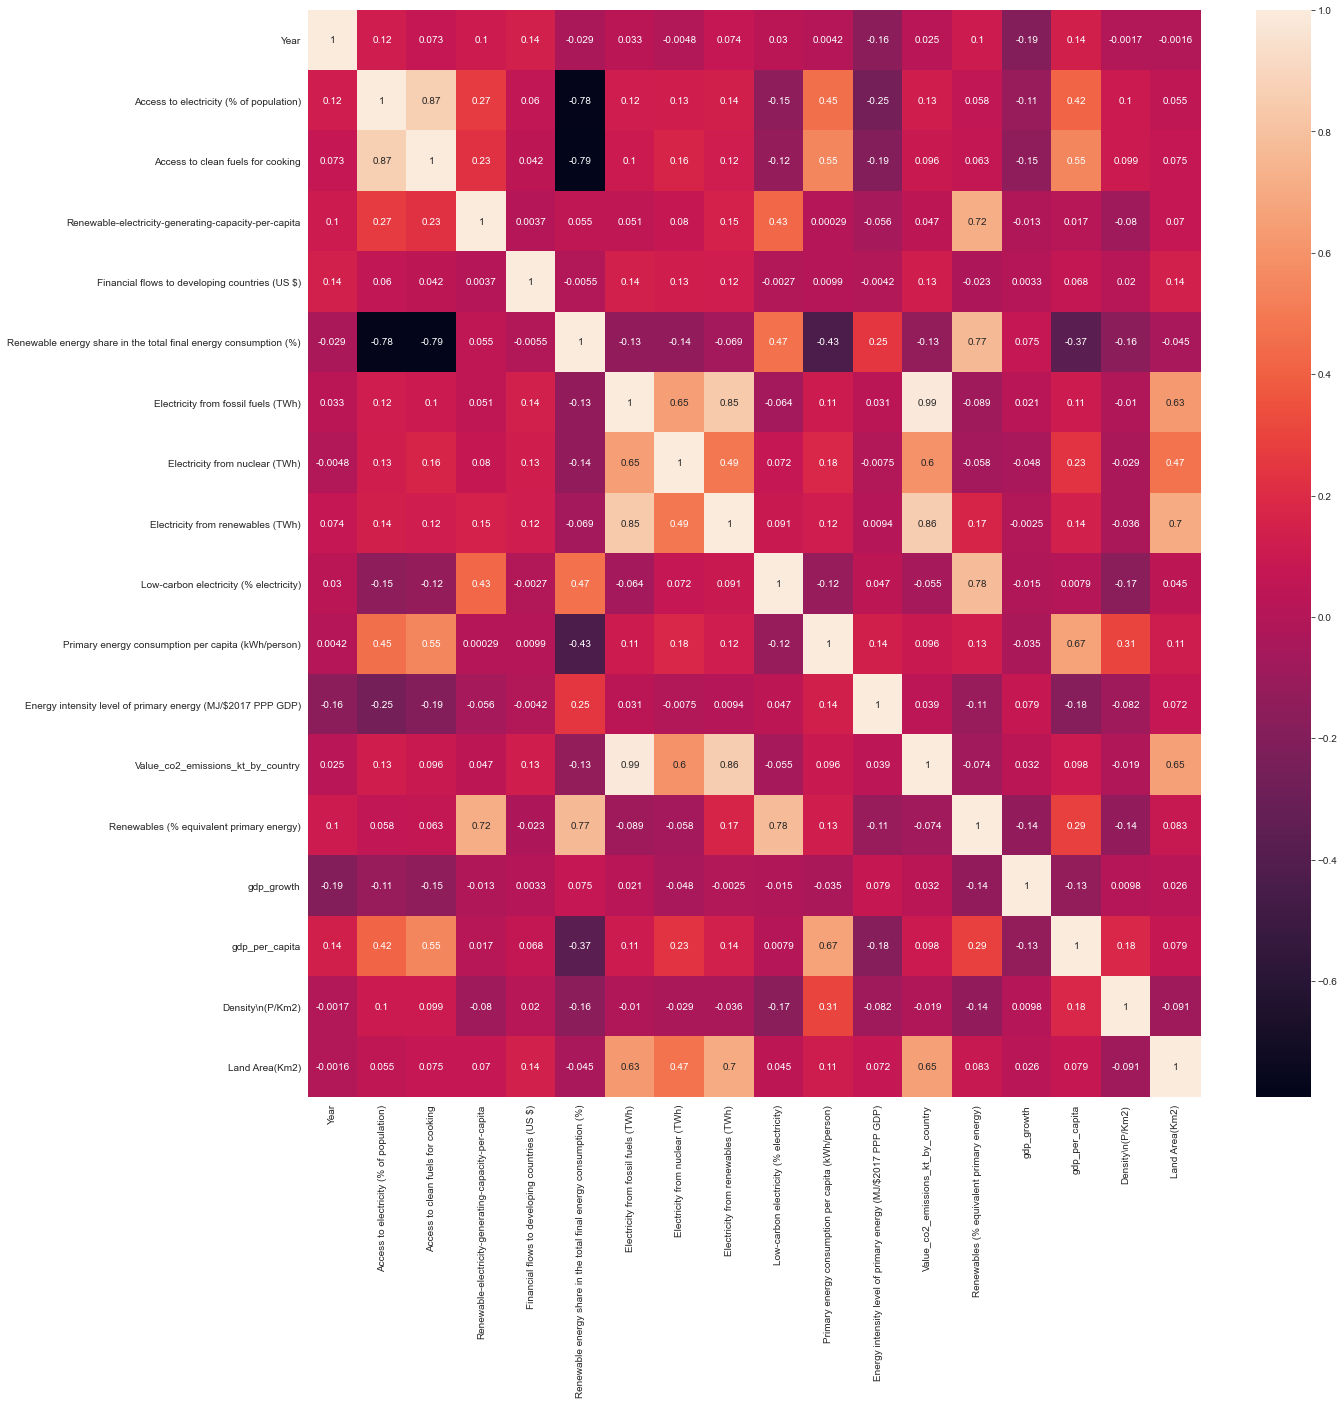

In [13]:
# Correlation Analysis
plt.figure(figsize= (20,20))
sns.heatmap(df.corr(),annot=True)

- Renewable-electricity-generating-capacity-per-capita --------------->25.513839% null values <br>
- Financial flows to developing countries (US $)------------------------>57.248561% null values <br>
- Renewables (% equivalent primary energy) --------------------------->58.563990% null values <br>
<br> <blockquote>
- Renewables (% equivalent primary energy) is highly correlated to multiple features. Dropping it will  be a loss of information for our machine learning model.

- Renewable-electricity-generating-capacity-per-capita is also somewhat correlated to low carbon electricity. We can drop it because filling 25 percent missing values may introduce noise in our model. 

- Financial flows to developing countries (US $) is not that much correlated to other features, but we have to drop it because of the high percentage of null values. 

In [14]:
col_d= ['Renewable-electricity-generating-capacity-per-capita','Financial flows to developing countries (US $)','Renewables (% equivalent primary energy)']
for col in col_d:
    del df[col]

# Dropping Null Values

In [15]:
# Filtering rows having null values in Value_co2_emissions_kt_by_country 
filtered= df[df['Value_co2_emissions_kt_by_country'].isnull()].drop('Entity',axis=1)
filtered

,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),Low-carbon electricity (% electricity),Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2)
20,2020,97.700000,33.2,NaN,0.12,0.0,0.68,85.000000,702.8880,NaN,NaN,-2.351101,516.747871,60.0,652230.0
41,2020,100.000000,81.3,NaN,0.00,0.0,5.31,100.000000,11158.0030,NaN,NaN,-3.955398,5246.292306,105.0,28748.0
62,2020,99.804130,99.7,NaN,72.01,0.0,0.72,0.989963,14933.8070,NaN,NaN,-5.100000,3306.858208,18.0,2381741.0
83,2020,46.890610,50.2,NaN,4.49,0.0,12.10,72.935500,3527.1600,NaN,NaN,-5.399987,1776.166868,26.0,1246700.0
104,2020,100.000000,100.0,NaN,0.31,0.0,0.02,6.060606,27785.2270,NaN,NaN,-20.192371,13992.744480,223.0,443.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3604,2018,62.000000,61.5,3.60,2.82,0.0,0.48,14.545455,1170.7261,NaN,NaN,NaN,NaN,56.0,527968.0
3605,2019,72.751076,61.3,3.11,2.93,0.0,0.48,14.076246,1475.9852,NaN,NaN,NaN,NaN,56.0,527968.0
3606,2020,73.757930,61.5,NaN,2.74,0.0,0.49,15.170279,1092.0021,NaN,NaN,NaN,NaN,56.0,527968.0
3627,2020,44.524475,10.4,NaN,2.00,0.0,13.10,86.754970,3099.0830,NaN,NaN,-2.785055,985.132436,25.0,752618.0


<AxesSubplot:>

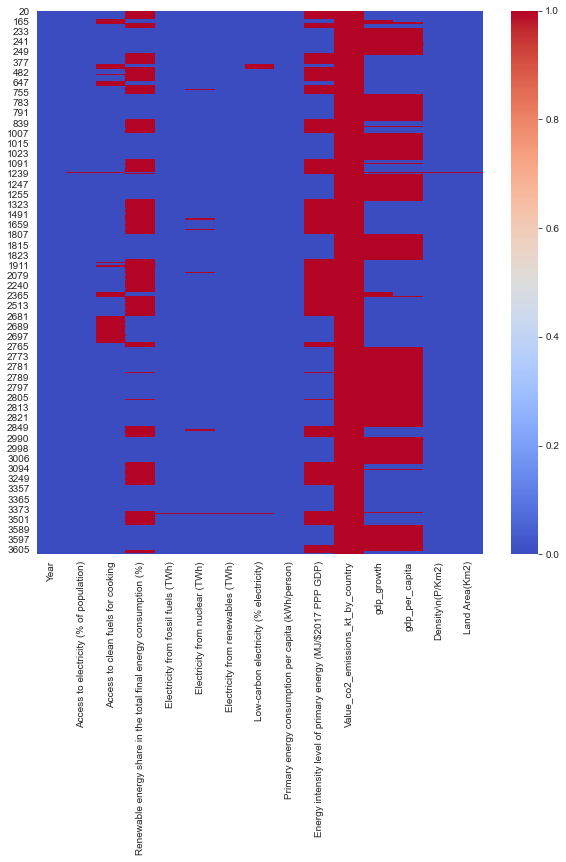

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(filtered.isnull(),cmap='coolwarm')

It's clear from the heatmap and filtered df that corresponding to null values of “Value_co2_emissions_kt_by_country”, there are other features having null values. <br>
**In this case dropping rows having null values in Value_co2_emissions_kt_by_country will help us in getting rid of other null values in other features also.** 


In [17]:
df.dropna(subset=['Value_co2_emissions_kt_by_country'],axis=0,inplace= True)

In [18]:
# let's see the change of null value percentage
null_perc= df.isnull().mean().sort_values()*100
print(null_perc)

Entity                                                              0.000000
Year                                                                0.000000
Primary energy consumption per capita (kWh/person)                  0.000000
Value_co2_emissions_kt_by_country                                   0.000000
Density\n(P/Km2)                                                    0.000000
Land Area(Km2)                                                      0.000000
Access to electricity (% of population)                             0.279416
Renewable energy share in the total final energy consumption (%)    0.620925
Electricity from fossil fuels (TWh)                                 0.620925
Electricity from renewables (TWh)                                   0.620925
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         0.776156
Low-carbon electricity (% electricity)                              1.148712
gdp_per_capita                                                      1.986961

# Data Imputation

In [19]:
#Features with null values.
col_i= null_perc[null_perc>0].index

In [20]:
described= df[col_i].describe()
described

,Access to electricity (% of population),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from renewables (TWh),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Low-carbon electricity (% electricity),gdp_per_capita,gdp_growth,Electricity from nuclear (TWh),Access to clean fuels for cooking
count,3212.000000,3201.000000,3201.000000,3201.000000,3196.000000,3184.000000,3157.000000,3126.000000,3101.000000,3093.000000
mean,78.008545,33.878747,73.287017,24.414180,5.461837,37.617045,12948.225043,3.861703,14.458668,62.172082
std,30.960935,30.155060,355.265465,102.133196,3.591119,34.321938,19331.385782,5.309454,75.855153,39.334393
min,1.252269,0.000000,0.000000,0.000000,1.030000,0.000000,111.927225,-62.075920,0.000000,0.000000
25%,56.591630,7.230000,0.300000,0.060000,3.290000,3.975259,1290.380508,1.725870,0.000000,21.700000
50%,97.900000,25.580000,3.100000,1.590000,4.450000,30.187931,4413.062005,3.789156,0.000000,81.500000
75%,100.000000,56.820000,27.770000,9.450000,6.170000,64.707375,15174.278430,5.954249,0.000000,100.000000
max,100.000000,96.040000,5098.220000,2014.570000,32.570000,100.000010,123514.196700,123.139555,809.410000,100.000000


**From above we can see that those features which have high standard deviation have a very big difference between 
median and mean. Filling these features with mean values might add incorrect information which is not close to reality.**

In [21]:
# Creating two group of columns.One where mean can be used and one where median can be used for data imputation.
described= described.transpose().sort_values(by='std')
median_col= described[described['std']>70].index
mean_col=  described[described['std']<70].index

In [22]:
print("median_col: ",list(median_col))
print("___________________________________________________________\n")

print("mean_col: ",list(mean_col))

median_col:  ['Electricity from nuclear (TWh)', 'Electricity from renewables (TWh)', 'Electricity from fossil fuels (TWh)', 'gdp_per_capita']
___________________________________________________________

mean_col:  ['Energy intensity level of primary energy (MJ/$2017 PPP GDP)', 'gdp_growth', 'Renewable energy share in the total final energy consumption (%)', 'Access to electricity (% of population)', 'Low-carbon electricity (% electricity)', 'Access to clean fuels for cooking']


## Primary EDA 

/Users/gauravjoshi/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


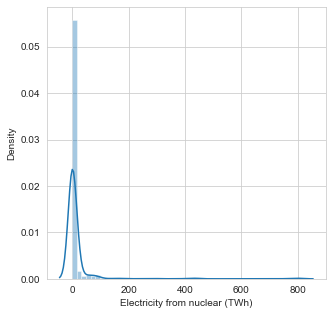

/Users/gauravjoshi/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


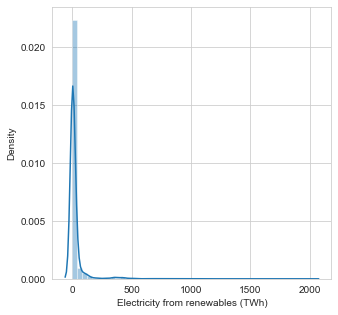

/Users/gauravjoshi/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


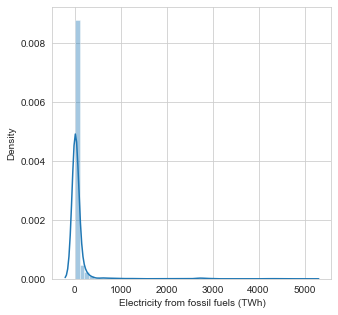

/Users/gauravjoshi/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


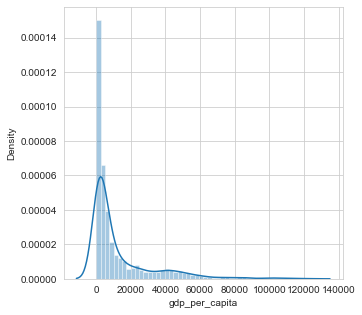

In [23]:
for col in median_col:
    plt.figure(figsize=(5,5))
    sns.distplot(df[col],hist=True, kde=True, label=col)
    plt.show()
    

/Users/gauravjoshi/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


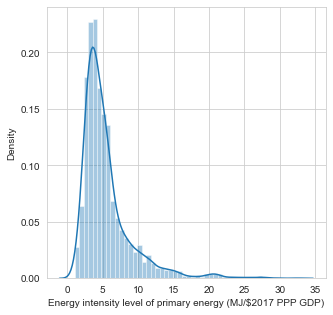

/Users/gauravjoshi/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


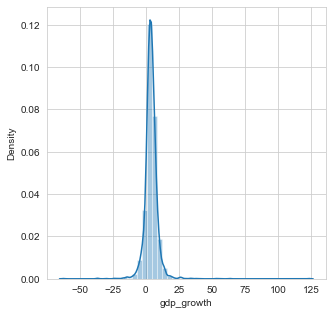

/Users/gauravjoshi/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


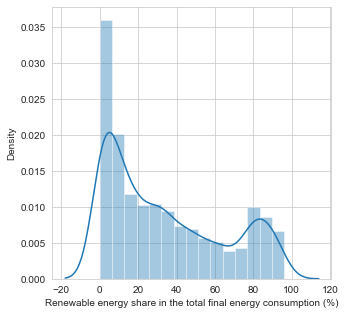

/Users/gauravjoshi/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


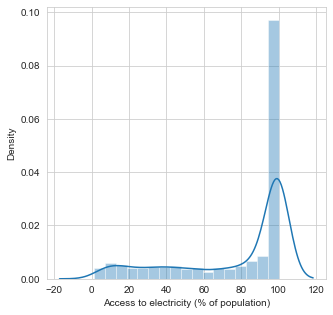

/Users/gauravjoshi/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


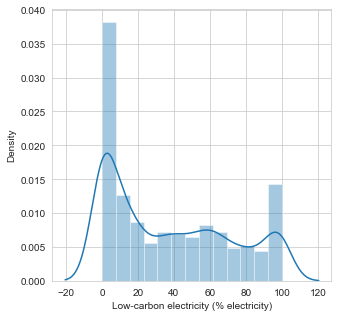

/Users/gauravjoshi/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


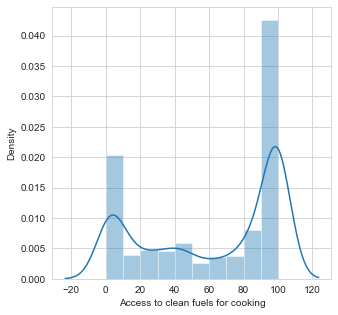

In [24]:
for col in mean_col:
    plt.figure(figsize=(5,5))
    sns.distplot(df[col],hist=True, kde=True, label=col)
    plt.show()
    

**From distribution graph it is clear that the bifurcation of features into columns to be filled by median and columns to be filled by mean is to some extent appropriate, but there are some features like 'Renewable energy share in the total final energy consumption (%)', 'Low-carbon electricity (% electricity)', 'Access to clean fuels for cooking'
for which we can check the mode to take further decison.**

In [25]:
mode_col= ['Renewable energy share in the total final energy consumption (%)', 'Low-carbon electricity (% electricity)', 'Access to clean fuels for cooking']
for col in mode_col:
    print(col,df[col].mode()[0])

Renewable energy share in the total final energy consumption (%) 0.0
Low-carbon electricity (% electricity) 0.0
Access to clean fuels for cooking 100.0


**If above values and distribution graph are taken into consideration, it's better to fill (1) & (2) with mode and (3) with median because for (1) and (2), the chance of missing value to be close to zero is more..**

In [26]:
mean_col = list(set(mean_col)-set(mode_col))+list(set(mode_col)-set(mode_col))

In [27]:
print("mean_col: ",mean_col)
print("\n")
print("median_col: ",list(median_col))
print("\n")
print("mode_col: ",mode_col)

mean_col:  ['gdp_growth', 'Access to electricity (% of population)', 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)']


median_col:  ['Electricity from nuclear (TWh)', 'Electricity from renewables (TWh)', 'Electricity from fossil fuels (TWh)', 'gdp_per_capita']


mode_col:  ['Renewable energy share in the total final energy consumption (%)', 'Low-carbon electricity (% electricity)', 'Access to clean fuels for cooking']


In [28]:
# Filling the null values.
for i in mean_col:
    df[i].fillna(df[i].mean(),inplace=True)
for i in median_col:
    df[i].fillna(df[i].median(),inplace=True)
for i in mode_col:
    df[i].fillna(df[i].mode()[0],inplace=True)

In [29]:
# Checking the null values
df.isnull().mean().sort_values()*100

Entity                                                              0.0
Year                                                                0.0
Access to electricity (% of population)                             0.0
Access to clean fuels for cooking                                   0.0
Renewable energy share in the total final energy consumption (%)    0.0
Electricity from fossil fuels (TWh)                                 0.0
Electricity from nuclear (TWh)                                      0.0
Electricity from renewables (TWh)                                   0.0
Low-carbon electricity (% electricity)                              0.0
Primary energy consumption per capita (kWh/person)                  0.0
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         0.0
Value_co2_emissions_kt_by_country                                   0.0
gdp_growth                                                          0.0
gdp_per_capita                                                  

In [30]:
# Checking duplicate rows
df.duplicated().value_counts()
#No duplicate rows

False    3221
dtype: int64

In [41]:
# Converting Year into Datetime year
df['Year']= pd.to_datetime(df['Year'],format= '%Y').dt.year

0       2000
1       2001
2       2002
3       2003
4       2004
        ... 
3643    2015
3644    2016
3645    2017
3646    2018
3647    2019
Name: Year, Length: 3221, dtype: int64

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3221 entries, 0 to 3647
Data columns (total 16 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3221 non-null   object 
 1   Year                                                              3221 non-null   int64  
 2   Access to electricity (% of population)                           3221 non-null   float64
 3   Access to clean fuels for cooking                                 3221 non-null   float64
 4   Renewable energy share in the total final energy consumption (%)  3221 non-null   float64
 5   Electricity from fossil fuels (TWh)                               3221 non-null   float64
 6   Electricity from nuclear (TWh)                                    3221 non-null   float64
 7   Electricity from renewables (TWh)

In [43]:
# Saving file for data analysis. 
df.to_csv("stage2.csv")